In [60]:
# Assignment 7

# Logistic regression

In [61]:
import pandas as pd

train_set = pd.read_csv('Titanic_train.csv')
test_set = pd.read_csv('Titanic_test.csv')

df = pd.concat([train_set,test_set],axis=0)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [62]:
df.shape

(1309, 12)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [64]:
# missing values

df.isnull().mean()*100

PassengerId     0.000000
Survived       31.932773
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Cabin          77.463713
Embarked        0.152788
dtype: float64

In [65]:
# Dropping PassengerId, Name ,Ticket
# Dropping Cabin : Too many missing values

df = df.drop(["PassengerId",'Name','Ticket','Cabin'],axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,male,22.0,1,0,7.2500,S
1,1.0,1,female,38.0,1,0,71.2833,C
2,1.0,3,female,26.0,0,0,7.9250,S
3,1.0,1,female,35.0,1,0,53.1000,S
4,0.0,3,male,35.0,0,0,8.0500,S


In [66]:
# handling missing values

df['Fare'] = df['Fare'].fillna(df['Fare'].median())
df['Fare'] = np.round(df['Fare'],2)

df['Age'] = df['Age'].fillna(df['Age'].median())

df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [67]:
# childern & females had high chances of survival
# Men & elderly not much
df.loc[df['Survived'].isna() & (df['Age'] < 12), 'Survived'] = 1.0

df.loc[df['Survived'].isna() & (df['Sex'] == 'female'), 'Survived'] = 1.0

df.loc[df['Survived'].isna() & (df['Age'] > 60), 'Survived'] = 0.0

df.loc[df['Survived'].isna(), 'Survived'] = 0.0

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   float64
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1309 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Fare      1309 non-null   float64
 7   Embarked  1309 non-null   object 
dtypes: float64(3), int64(3), object(2)
memory usage: 92.0+ KB


In [69]:
# OneHotEncoding : Sex , Embarked

Sex_encoder = pd.get_dummies(df['Sex'], dtype=int, prefix='Sex')
df = pd.concat([df, Sex_encoder], axis=1)
df = df.drop(columns=['Sex'])

# Encode Embarked
Embarked_encoder = pd.get_dummies(df['Embarked'], dtype=int, prefix='Embarked')
df = pd.concat([df, Embarked_encoder], axis=1)
df = df.drop(columns=['Embarked'])

In [70]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,3,22.0,1,0,7.25,0,1,0,0,1
1,1.0,1,38.0,1,0,71.28,1,0,1,0,0
2,1.0,3,26.0,0,0,7.92,1,0,0,0,1
3,1.0,1,35.0,1,0,53.10,1,0,0,0,1
4,0.0,3,35.0,0,0,8.05,0,1,0,0,1


In [71]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,0.387319,2.294882,29.503186,0.498854,0.385027,33.281238,0.355997,0.644003,0.206264,0.093965,0.699771
std,0.487324,0.837836,12.905241,1.041658,0.865560,51.741581,0.478997,0.478997,0.404777,0.291891,0.458533
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.900000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.450000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.280000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.330000,1.000000,1.000000,1.000000,1.000000,1.000000


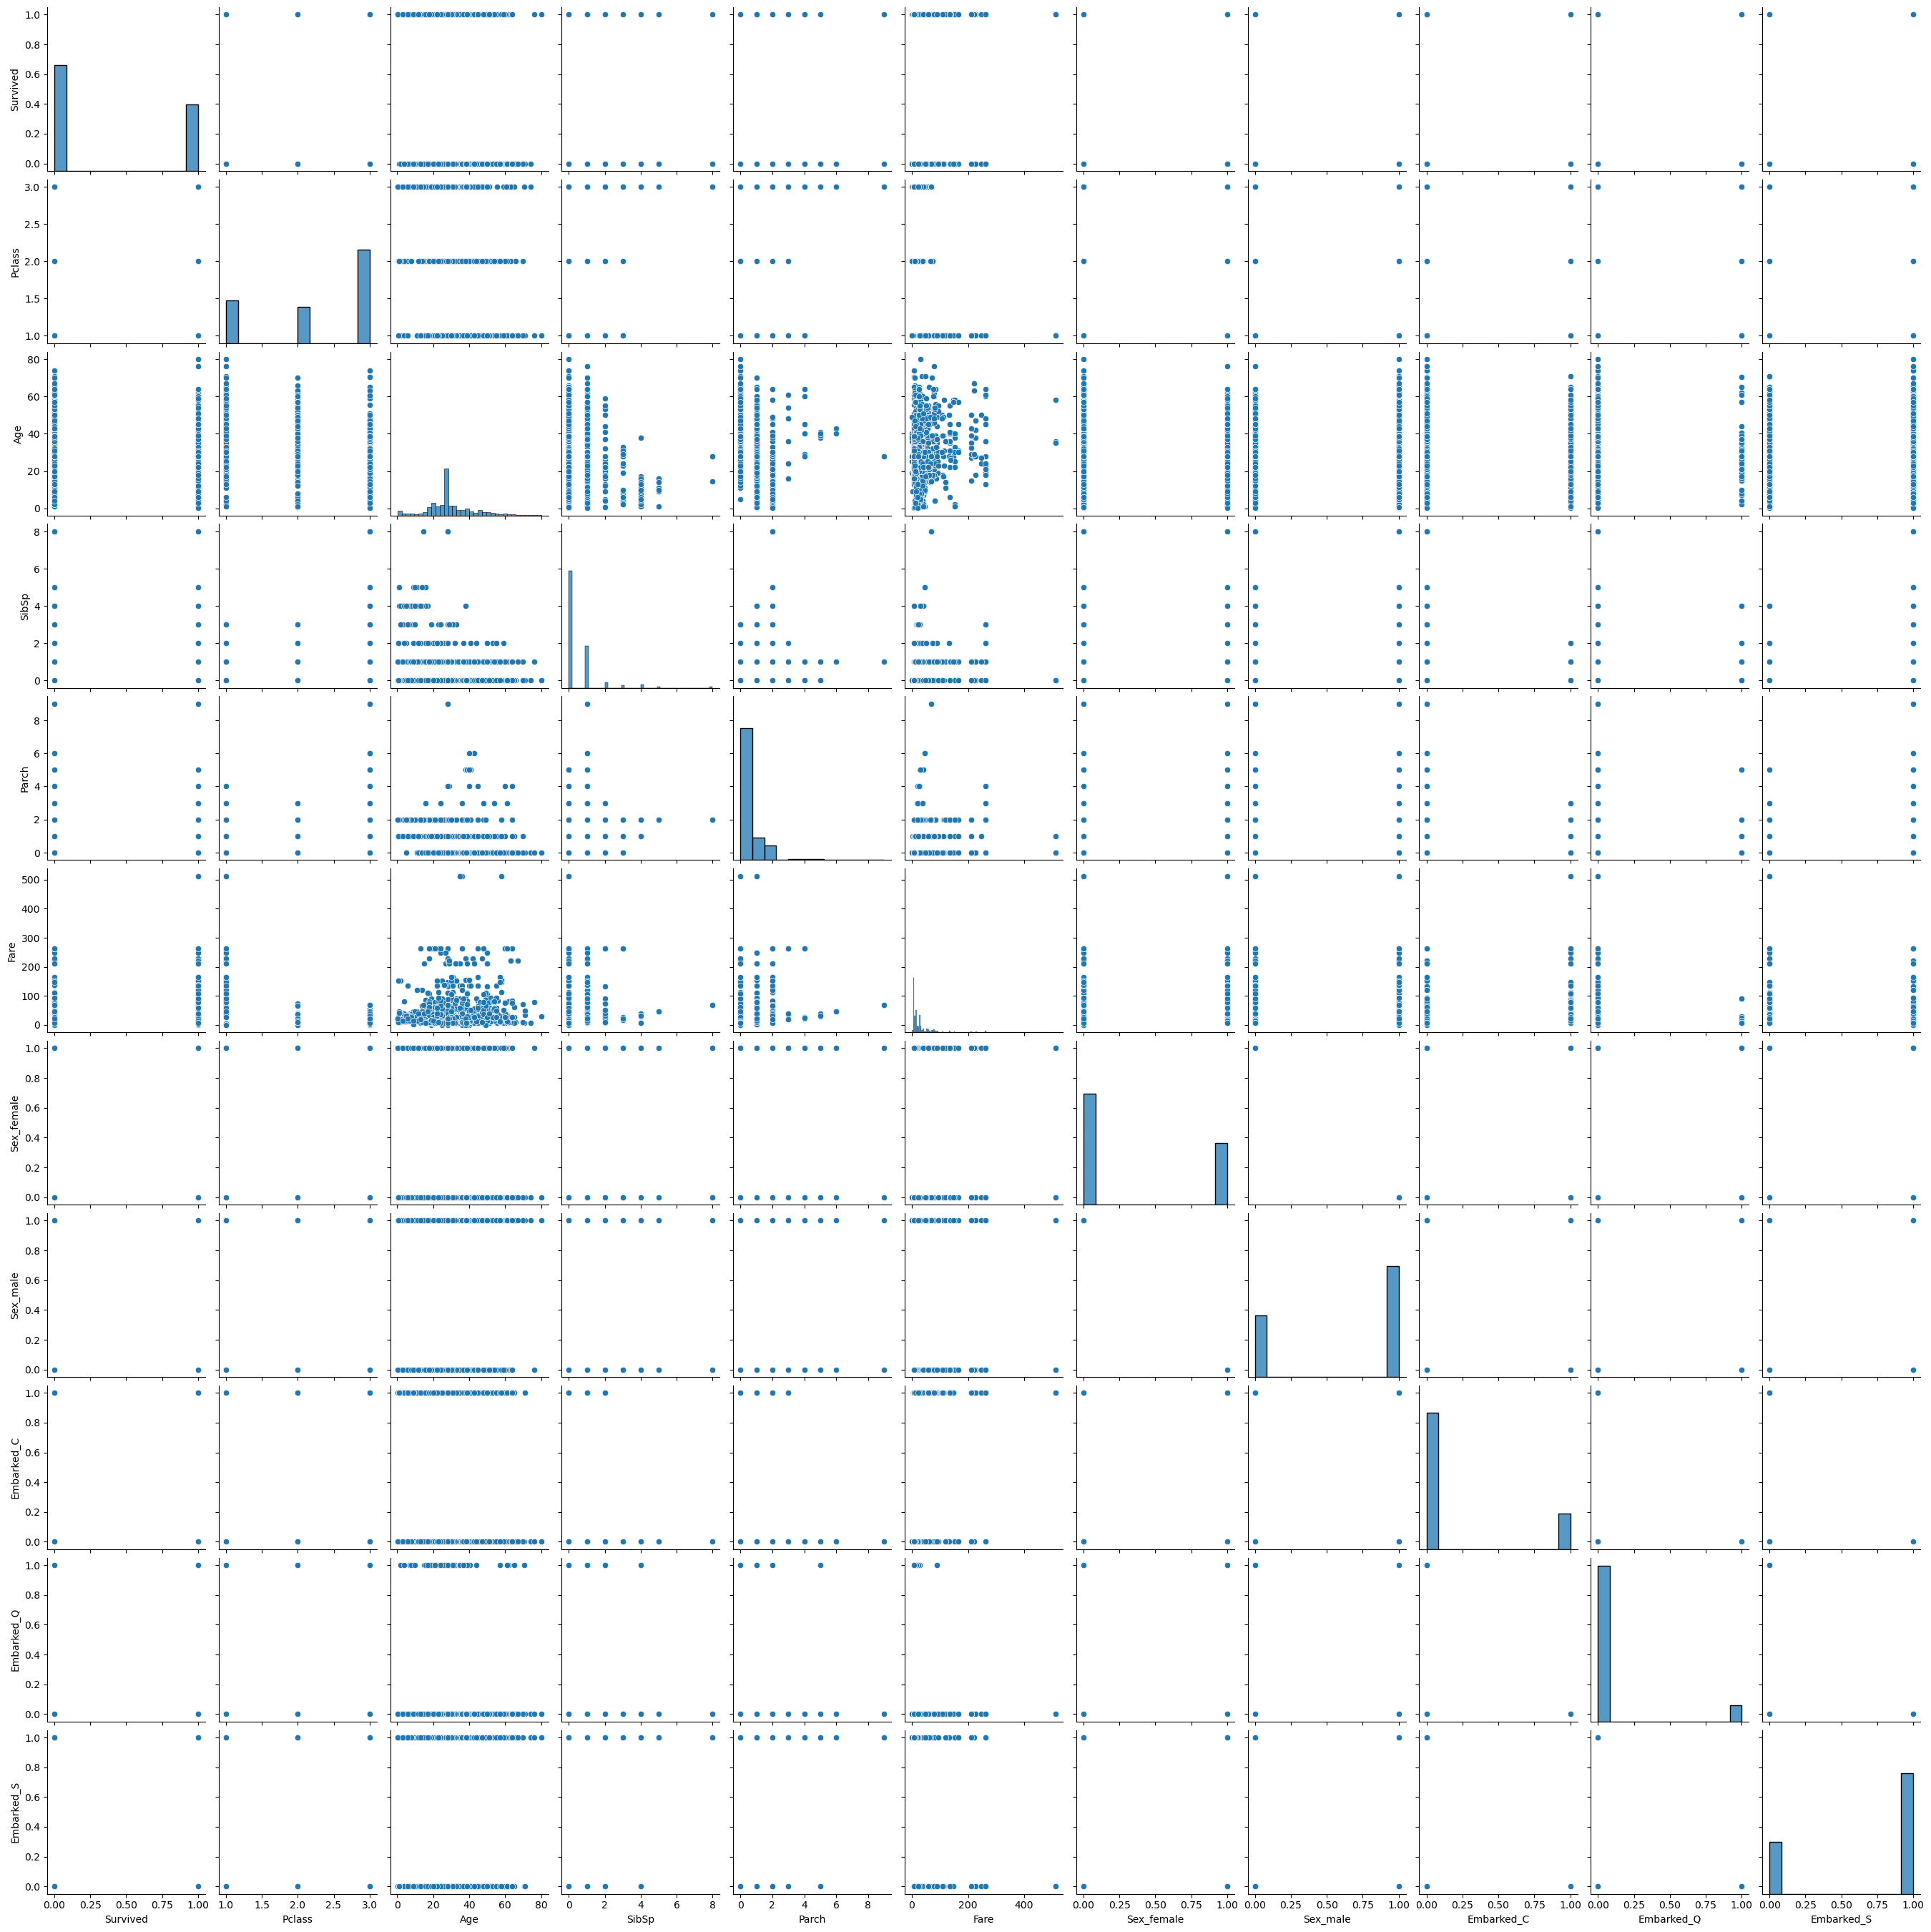

In [72]:
import seaborn as sns

sns.pairplot(df)

<Axes: >

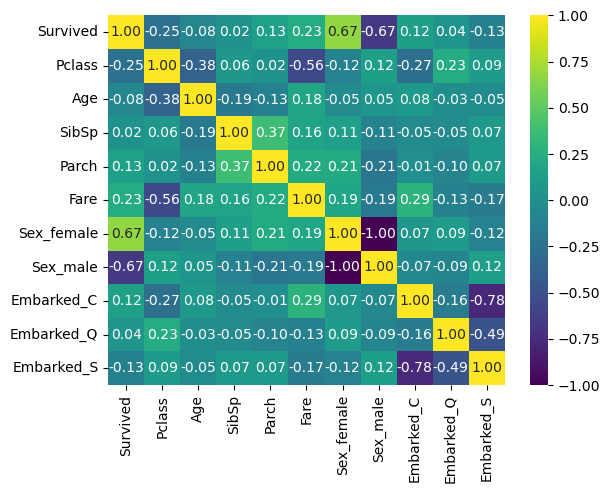

In [73]:
# correlation 

corr_matrix = df.corr()
sns.heatmap(corr_matrix,cmap='viridis',annot=True,fmt=".2f")

In [74]:
df.drop('Sex_female',axis=1,inplace=True)     # since Sex_male & Sex_female highly correlated

df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.253730,-0.080895,0.016689,0.130122,0.230332,-0.669816,0.121792,0.039557,-0.132695
Pclass,-0.253730,1.000000,-0.377908,0.060832,0.018322,-0.558681,0.124617,-0.269658,0.230491,0.091320
Age,-0.080895,-0.377908,1.000000,-0.189972,-0.125851,0.178180,0.053663,0.075016,-0.031132,-0.046404
SibSp,0.016689,0.060832,-0.189972,1.000000,0.373587,0.160351,-0.109609,-0.048396,-0.048678,0.073709
Parch,0.130122,0.018322,-0.125851,0.373587,1.000000,0.221639,-0.213125,-0.008635,-0.100943,0.071881
Fare,0.230332,-0.558681,0.178180,0.160351,0.221639,1.000000,-0.185680,0.286364,-0.129961,-0.170063
Sex_male,-0.669816,0.124617,0.053663,-0.109609,-0.213125,-0.185680,1.000000,-0.066564,-0.088651,0.115193
Embarked_C,0.121792,-0.269658,0.075016,-0.048396,-0.008635,0.286364,-0.066564,1.000000,-0.164166,-0.778262
Embarked_Q,0.039557,0.230491,-0.031132,-0.048678,-0.100943,-0.129961,-0.088651,-0.164166,1.000000,-0.491656
Embarked_S,-0.132695,0.091320,-0.046404,0.073709,0.071881,-0.170063,0.115193,-0.778262,-0.491656,1.000000


In [75]:
test_set.shape

(418, 11)

In [76]:
from sklearn.linear_model import LogisticRegression

X = df.drop('Survived',axis=1)
y = df['Survived']

test_size = df.iloc[-418:]

X_train,X_test,y_train,y_test = X.iloc[:-418], X.iloc[-418:], y.iloc[:-418], y.iloc[-418:]

In [77]:
# correlation among X_train

X_train.corr()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
Pclass,1.000000,-0.339898,0.083081,0.018443,-0.549496,0.131900,-0.243292,0.221009,0.074053
Age,-0.339898,1.000000,-0.233296,-0.172482,0.096686,0.081163,0.030248,-0.031415,-0.006729
SibSp,0.083081,-0.233296,1.000000,0.414838,0.159653,-0.114631,-0.059528,-0.026354,0.068734
Parch,0.018443,-0.172482,0.414838,1.000000,0.216230,-0.245489,-0.011069,-0.081228,0.060814
Fare,-0.549496,0.096686,0.159653,0.216230,1.000000,-0.182332,0.269330,-0.117219,-0.162178
Sex_male,0.131900,0.081163,-0.114631,-0.245489,-0.182332,1.000000,-0.082853,-0.074115,0.119224
Embarked_C,-0.243292,0.030248,-0.059528,-0.011069,0.269330,-0.082853,1.000000,-0.148258,-0.782742
Embarked_Q,0.221009,-0.031415,-0.026354,-0.081228,-0.117219,-0.074115,-0.148258,1.000000,-0.499421
Embarked_S,0.074053,-0.006729,0.068734,0.060814,-0.162178,0.119224,-0.782742,-0.499421,1.000000


In [78]:
# standardization

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [79]:
# model fitting
model = LogisticRegression()

model.fit(X_train_scaled,y_train)

y_pred = model.predict(X_test_scaled)

In [80]:
# intercepts & coefficients

print(f'Co-efficients of model : {model.coef_}')

print(f'intercept of model : {model.intercept_}')

Co-efficients of model : [[-0.90314167 -0.49721161 -0.35064496 -0.07171568  0.10275172 -1.28839834
   0.07825576  0.03746957 -0.09213489]]
intercept of model : [-0.64510058]


In [81]:
# performance metrics 

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,roc_curve

print (f'accuracy = {accuracy_score(y_test,y_pred):.2f}') 
print (f'classification report \n {classification_report(y_test,y_pred)}')
print (f'confusion_matrix : \n{confusion_matrix(y_test,y_pred)}')

accuracy = 0.92
classification report 
               precision    recall  f1-score   support

         0.0       0.92      0.95      0.93       253
         1.0       0.92      0.87      0.89       165

    accuracy                           0.92       418
   macro avg       0.92      0.91      0.91       418
weighted avg       0.92      0.92      0.92       418

confusion_matrix : 
[[240  13]
 [ 22 143]]


In [82]:
# roc_auc_score

y_proba = model.predict_proba(X_test_scaled)[:,1]

auc = roc_auc_score(y_test,y_proba)
print(auc)

0.9490238351898431


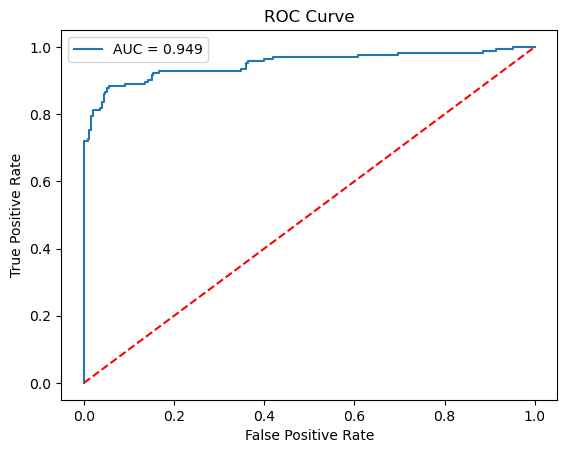

In [84]:
# roc_curve

import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0, 1], [0, 1], 'r--')  
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()


Observations :

Sex_male: (coefficient : -0.647) The model shows that being male had a major negative effect on a passenger's chance of survival. This confirms the "women and children first" protocol.

Pclass (Passenger Class): (coefficient :-0.904) A higher passenger class (Pclass=3) drastically reduced the probability of survival. May be higher-paying Pclass=1 had better access to the lifeboats.

Age: (coefficient : -0.498) indicates that being older decreased a passenger's chance of survival.

SibSp (Siblings/Spouses): (coefficient : -0.352) suggests that having more siblings or spouses on board lowered the survival rate.

### Interview Questions

1. Precision vs Recall (sensitivity)
   
    a. Precision :
   - Focuses on accuracy of positive predictions.
   - Avoids False positive.
   - High precision means very few false positives.
     
   
    b. Recall :
   - Focuses on Coverage of actual positives.
   - Avoids False negatives.
   - High recall means very few false negatives.


2. Cross-Validation : CV

   - Cross-validation is a technique to evaluate the performance of a model more reliably by splitting dataset into multiple parts instead of a single train-test split.
     
   - Can be used for hyperparameter tuning by getting best parameters for model.
   - Helps detect overfitting if a model performs well on training folds but poorly on validation folds.
   - Useful for imbalanced classes